In [1]:
using Pkg, CairoMakie

In [52]:
# Pkg.add("GeometrBasics")
Pkg.add("Colors")

   Resolving package versions...
    Updating `~/CELESTE/ACAD/CSB-Lab/NetworkEvolutionBSSE/TopoFiles/Project.toml`
  [5ae59095] + Colors v0.12.8
  No Changes to `~/CELESTE/ACAD/CSB-Lab/NetworkEvolutionBSSE/TopoFiles/Manifest.toml`


### Figure

Main object. A canvas, to which we can add `Axis`, `Legend`, `Colorbar` etc.

`resolution`. Takes a tuple of width and height, respectively (in constrast to matrices).

Create axis in the figure, at position `1,1`   using `Axis(f[1,1])`. Can also add `title`, `xlabel`, `ylabel` by passing them as parameters.  (but don't do this. Gives weird plots).





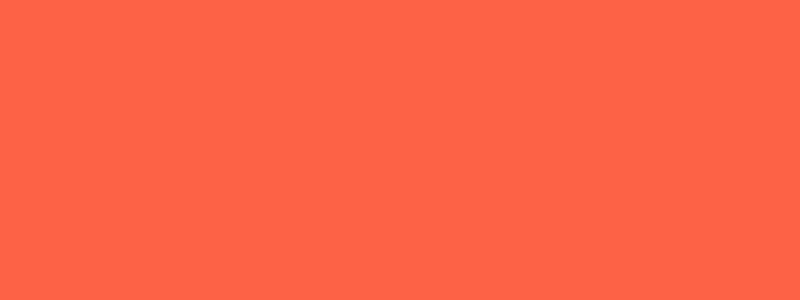

In [2]:
f = Figure(backgroundcolor=:tomato,
    resolution=(800, 300))

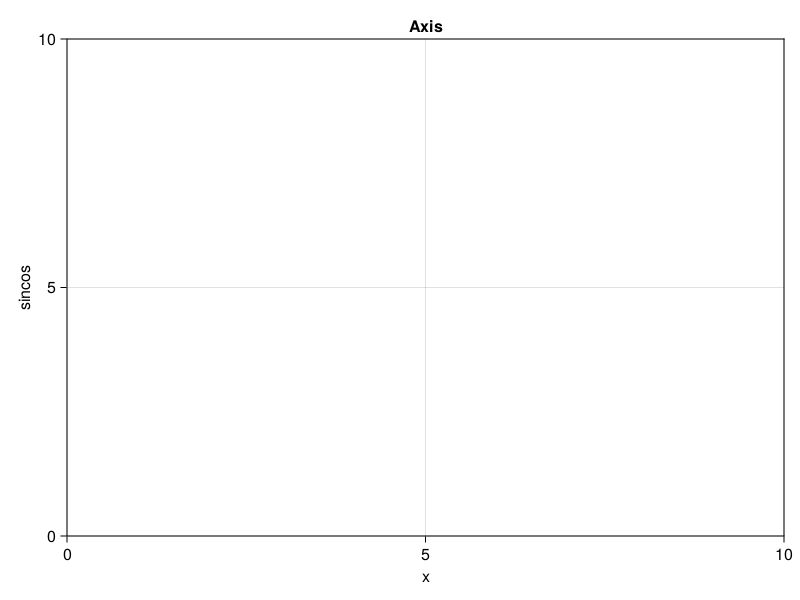

In [3]:
f = Figure()
ax = Axis(f[1,1], 
    title="Axis",
    xlabel="x", 
    ylabel="sincos")
f

In [ ]:
f = Figure()
ax = Axis(f[1, 1])
x = 1:0.2:10
y = sin.(x)
lines!(ax, x, y)
scatter!(ax, x, 2y)
f

Simpler syntax

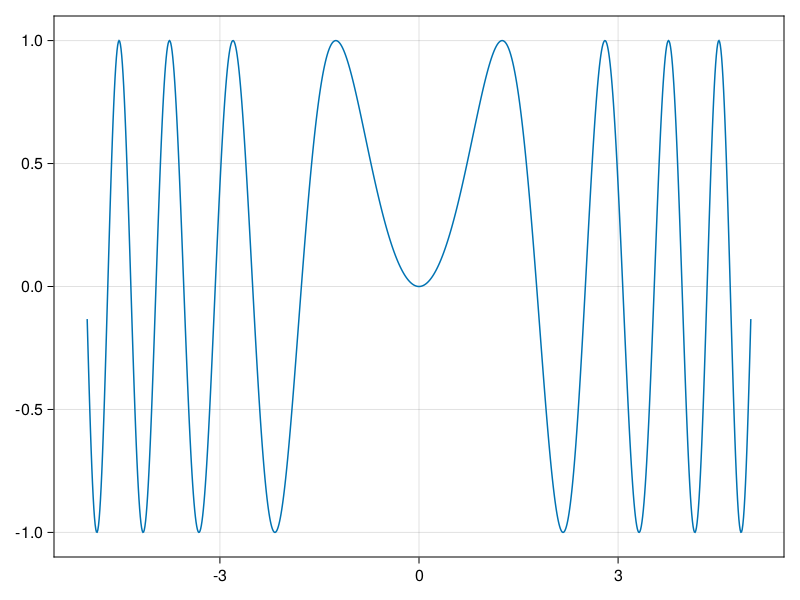

In [8]:
x = -5:0.01:5
y = sin.(x.^2)
lines(x, y)

`lines` returns a `FigureAxisPlot` object, which encapsulates the `fig`, `axis` and `plot` object.

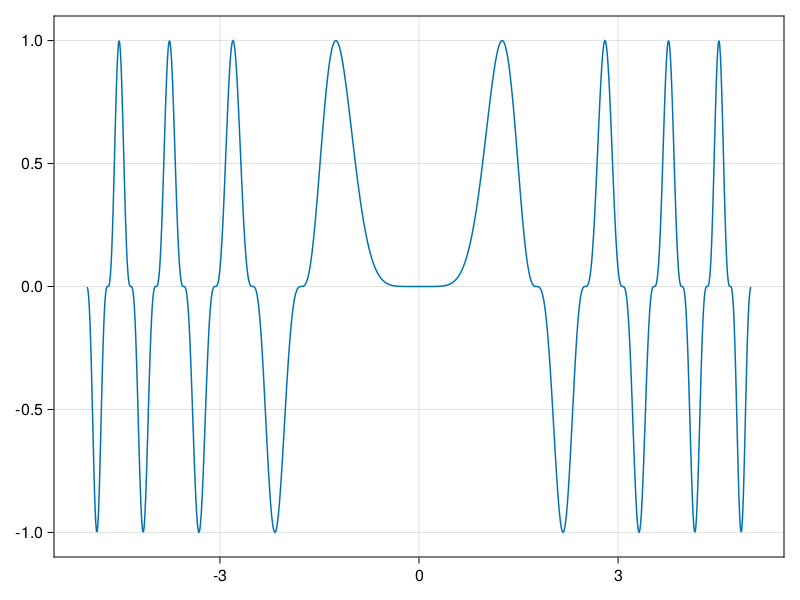

In [18]:
fig, axis, lineplot = lines(x, y.^3)
figtest = lines(x, y.^3) #same as above
fig

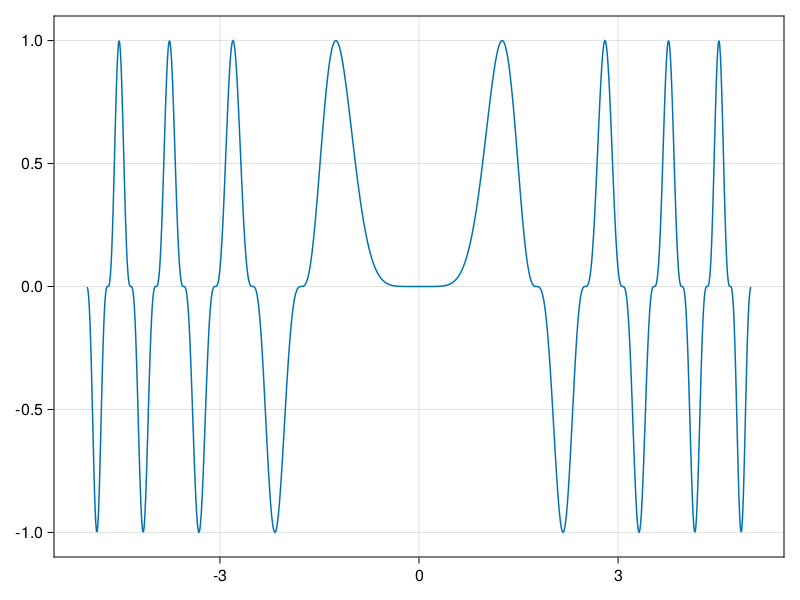

In [13]:
figtest

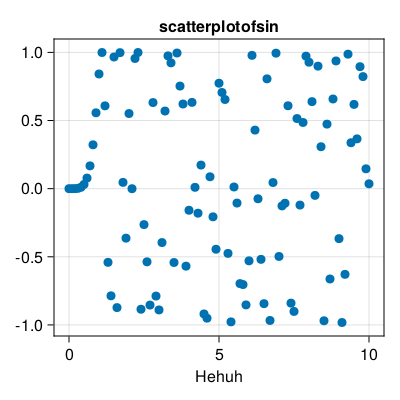

In [24]:
x = 0:0.1:10
y = sin.(x.^5)
scatter(x, y;
    figure = (; resolution=(400,400)),
    axis = (; title="scatterplotofsin", xlabel="Hehuh"))

The `;` signifies that we want a tuple, not a variable `resolution=(400,300)`.  

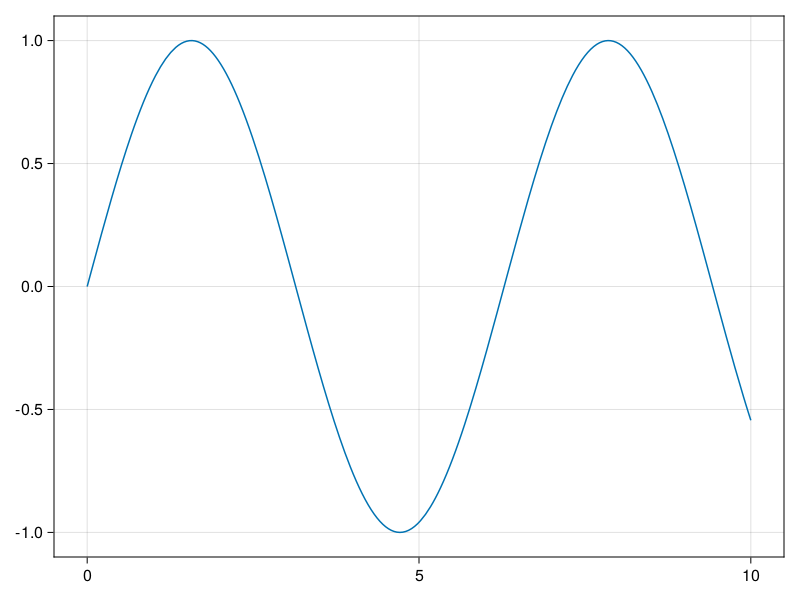

In [25]:
lines(0..10, sin)

In [63]:
# lines([Point(0,0), Points(5,10), Points(10, 5)])

Overplotting. Use mutating functions. However, they return only the `plot` object. 

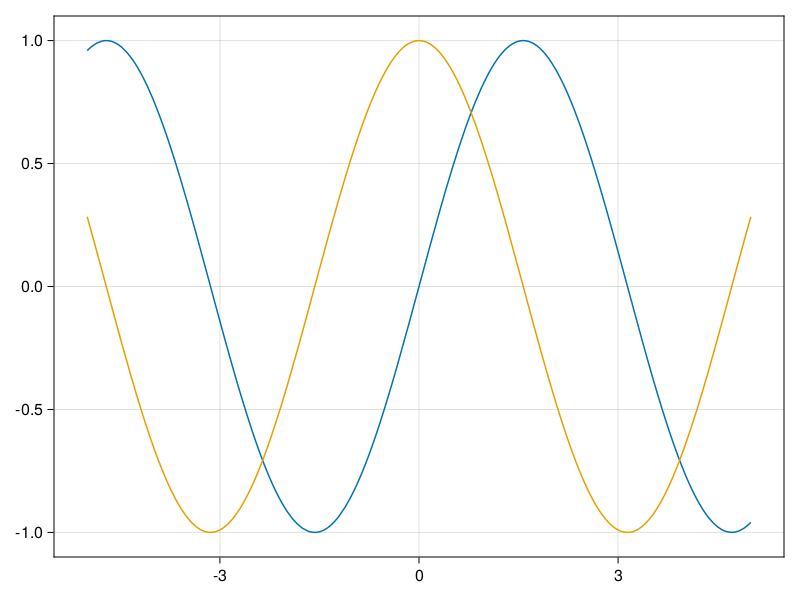

In [31]:
x = -5..5
f, ax, l1 = lines(x, sin)
l2 = lines!(ax, x, cos)
f

Also possible to omit `axis` argument. Last used axis (given by `current_axis()`) is used.

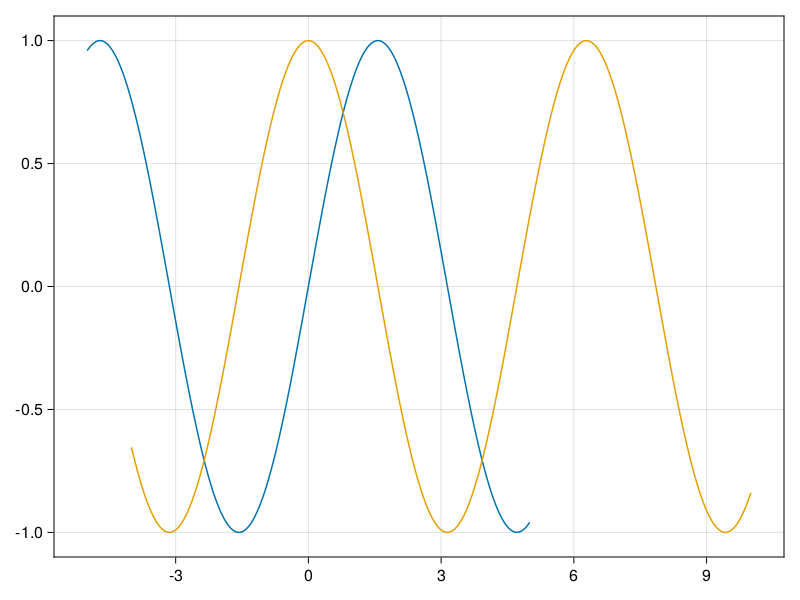

In [40]:
fig, ax, plot = lines(-5..5, sin)
lines!(-4..10, cos)
fig

Mutating functions like `line!` cannot accept arguments like `Figure` and `Axis` since they're working with those objects already created.

Giving hexa and `RGBf` colors requires the `Colors` package.

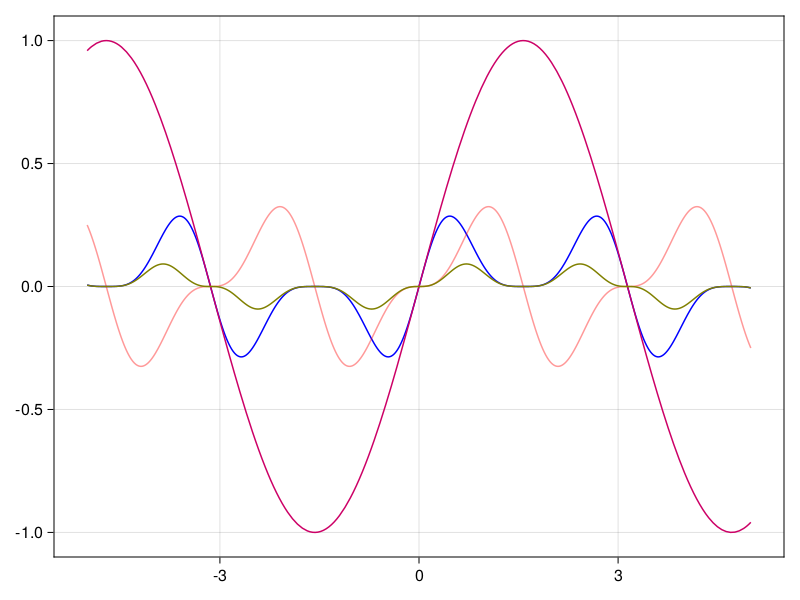

In [57]:
fig, ax, l1 = lines(-5..5, x -> sin(x)*cos(x)^4, color = :blue)
lines!(-5..5, x -> sin(x)^3*cos(x), color=("red",0.4))
lines!(-5..5, x -> sin(x), color="#cc0066")
lines!(-5..5, x -> cos(x)^4*sin(x)^3, color=RGBf(0.5, 0.5, 0))
fig


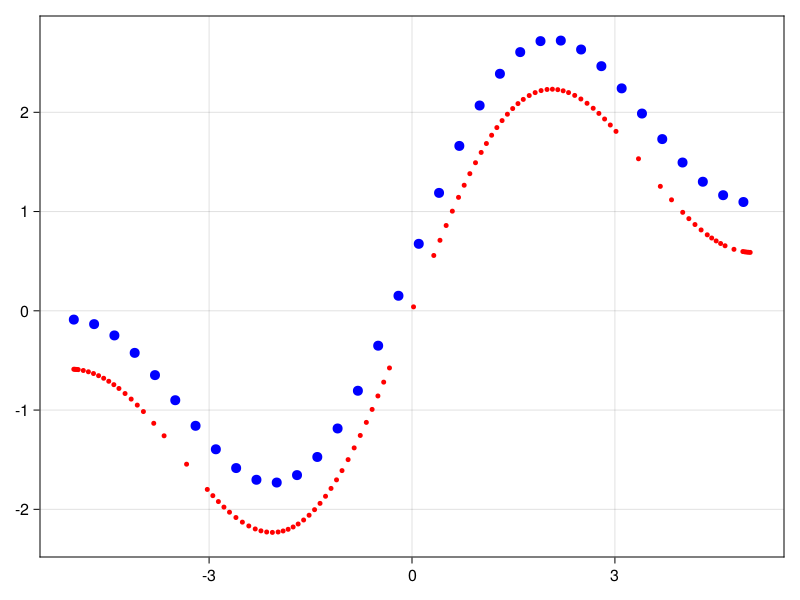

In [64]:
x = -5..5
fig, ax, sc1 = scatter(x, x->sin(x)+sin(x/2)+sin(x/4),
                    color=:red, 
                    markersize=5)

sc2 = scatter!(-5:0.3:5, x->sin(x)+sin(x/2)+sin(x/4)+0.5,
        color=:blue,
        markersize=10)
fig

The attributes of plots can be changed afterwards. Note the `markersize`, `strokecolor`, `strokewidth`, and `marker` properties. You can have no fill using `:transparent` as a color.

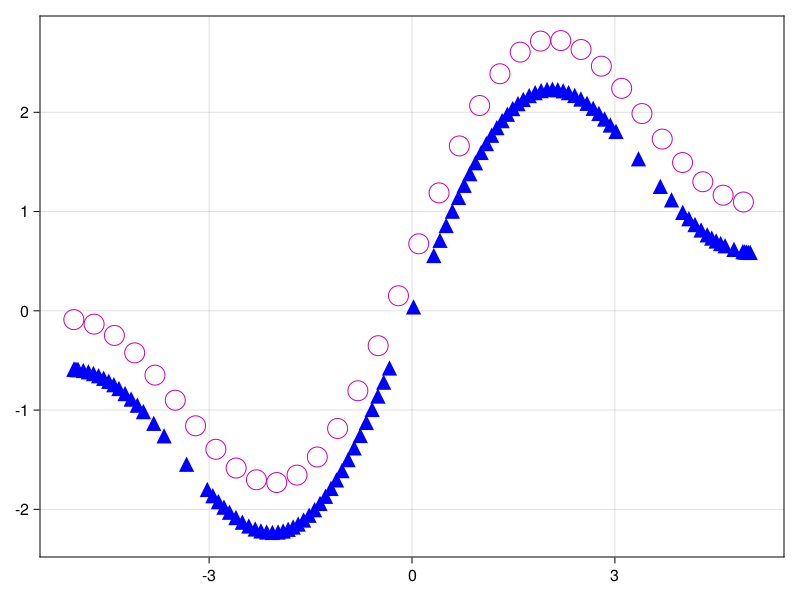

In [79]:
sc1.color = "blue"
sc1.marker = :utriangle

sc2.color = :transparent
sc2.markersize = 20
sc2.strokewidh = 1
sc2.strokecolor = "#cc00aa"
fig

Arrays as attributes

Using `colormap` attribute.

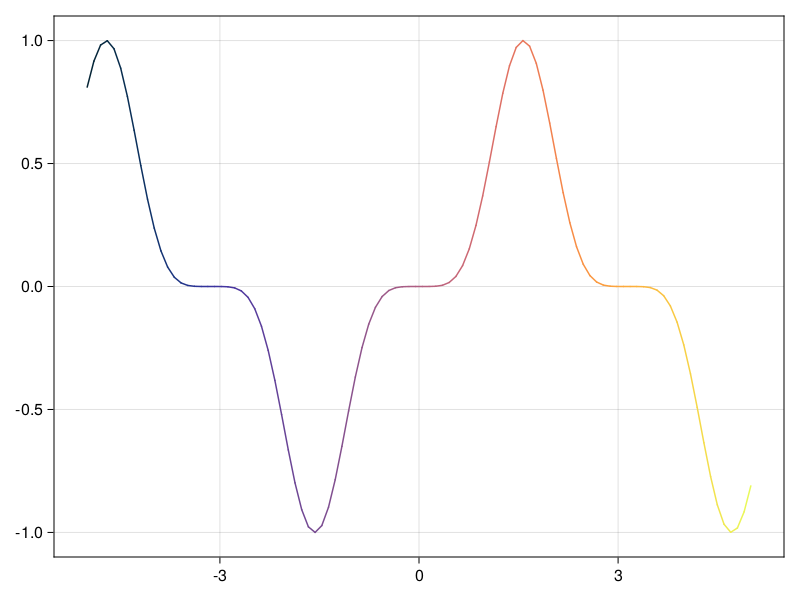

In [83]:
x=range(-5,5,length = 100)
fig, ax, l1 = lines(x, x->sin(x)^5,
    color=range(0,1,length=100),
    colormap=:thermal)
fig

Using an array of `RGBf` objects. 

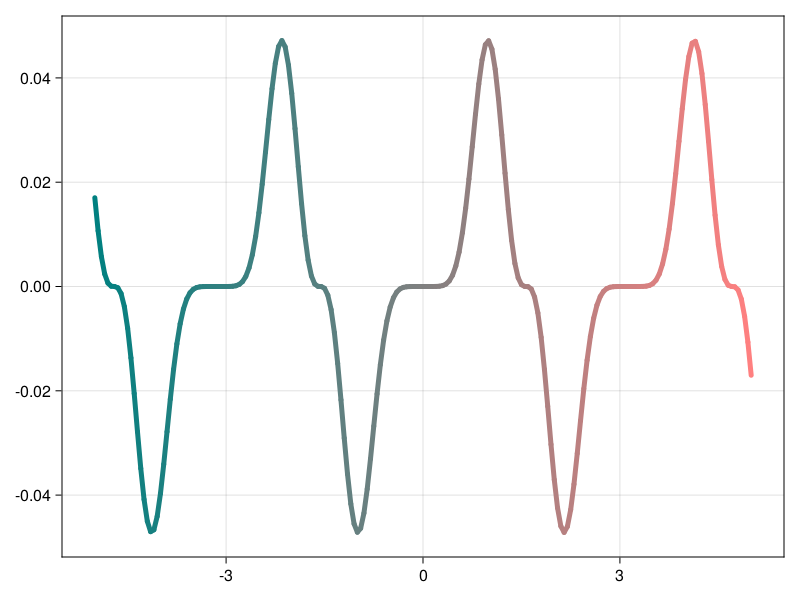

In [93]:
x = -5:0.05:5
lines(x, x->sin(x)^7*cos(x)^3,
    color=RGBf.(range(0,1,length=length(x)), 0.5,0.5),
    linewidth=5)

Note: `linewidth` attribute of `lines` cannot accept an array attribute.

Limit the colors actually used using the `colorrange` attribute. The values of the `color` attribute are constrained to that interval.

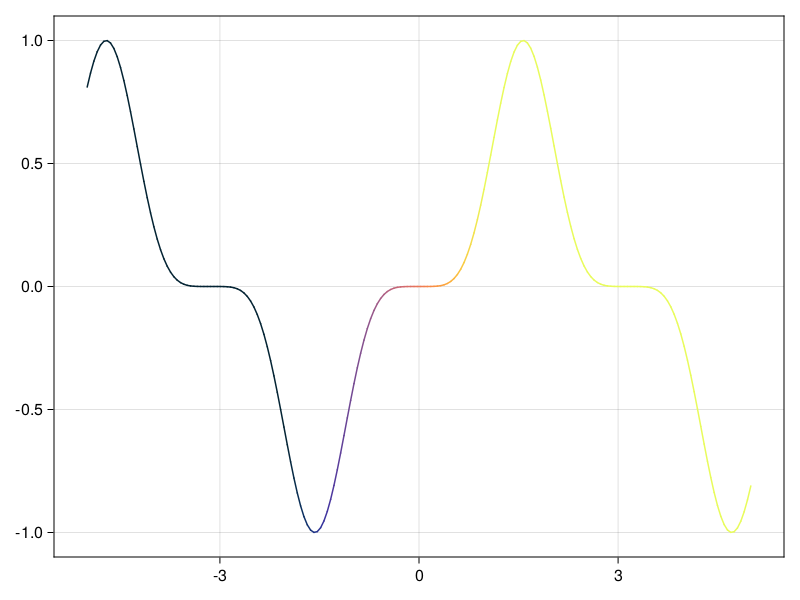

In [100]:
x=range(-5,5,length = 200)
fig, ax, l1 = lines(x, x->sin(x)^5,
    color=range(0,1,length=length(x)),
    colormap=:thermal,
    colorrange=(0.3,0.6))
fig

Constrain the colors to just 2 by setting `colorrange` to close values like
```
colorrange=(0.3,0.6)
```

### Legend
Use the `axislegend()` function

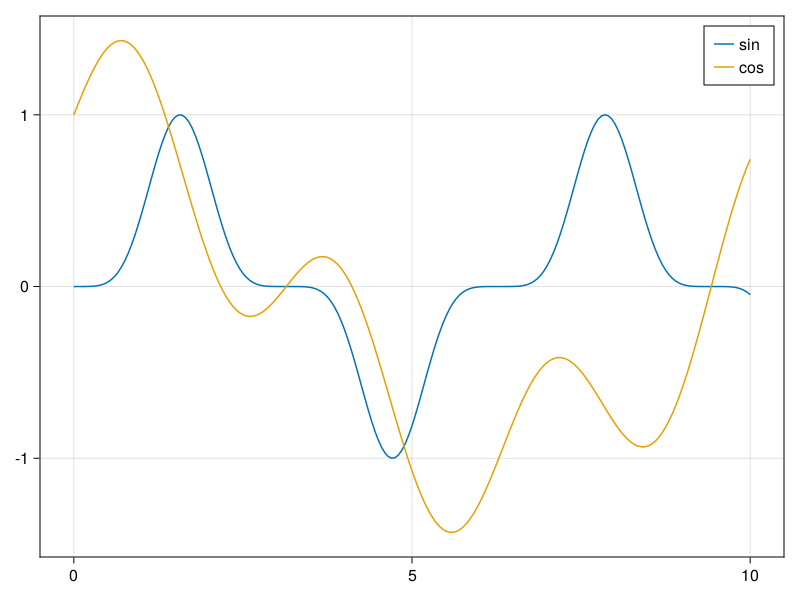

In [119]:
x = 0:0.05:10
fig, ax, l1 = lines(x, x->sin(x)^5, label="sin")
lines!(ax, x, x->cos(x)*sin(x)+cos(x/2), label="cos")
axislegend()
fig

### Subplots

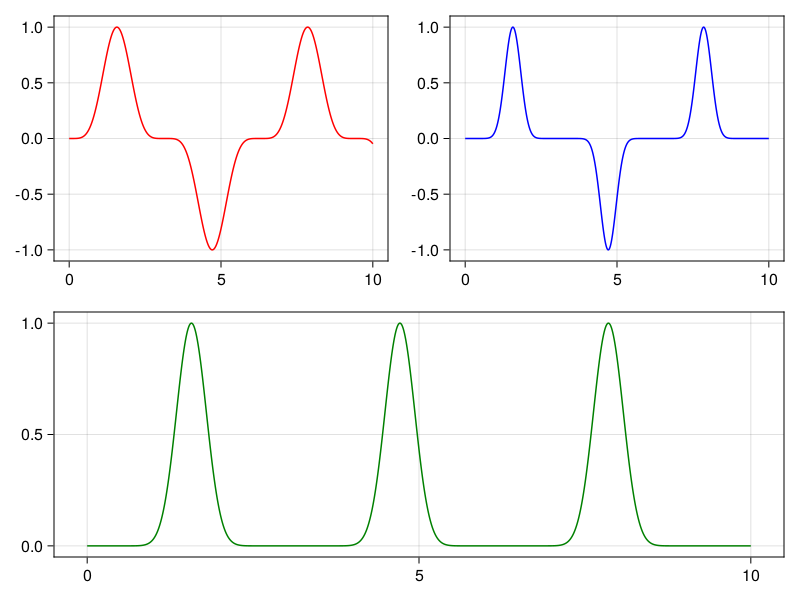

In [126]:
x = 0:0.01:10
y = (x->sin(x)^5).(x)
fig = Figure()
lines(fig[1,1], x, y, color=:red)
lines(fig[1,2], x, y .^3, color=:blue)
lines(fig[2,1:2], x, y .^4, color=:green)
fig

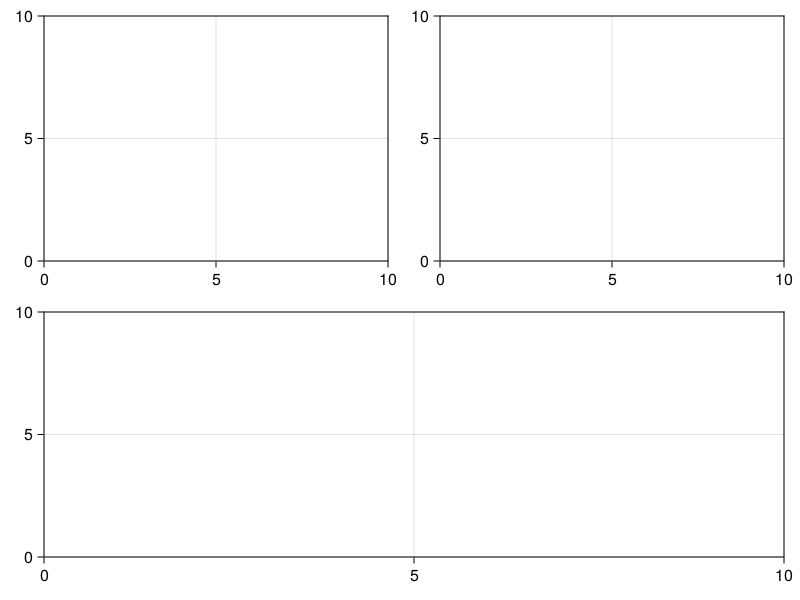

In [127]:
fig = Figure()
a1, a2, a3 = Axis.([fig[1,1], fig[1,2], fig[2, 1:2]])
fig

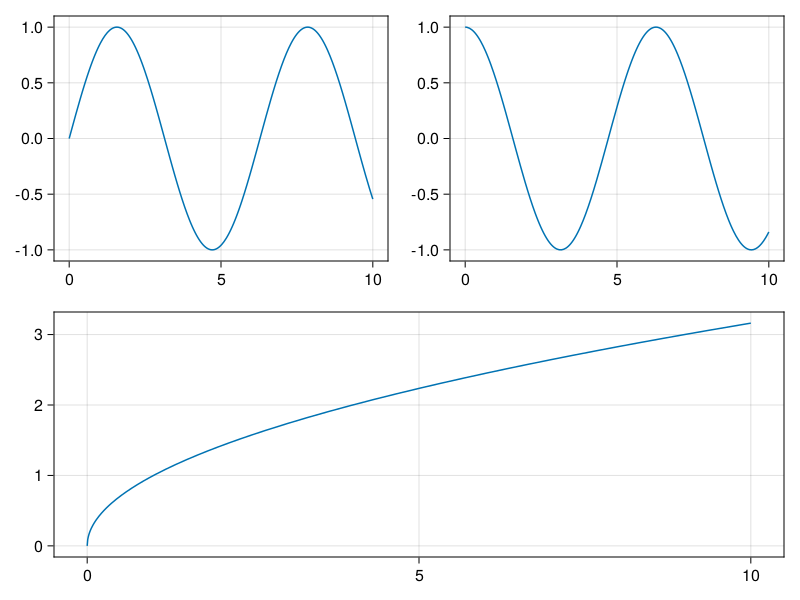

In [128]:
lines!(a1, 0..10, sin)
lines!(a2, 0..10, cos)
lines!(a3, 0..10, sqrt)
fig

### Giving legends

Use the `Legend` function for giving legends in subplots. 

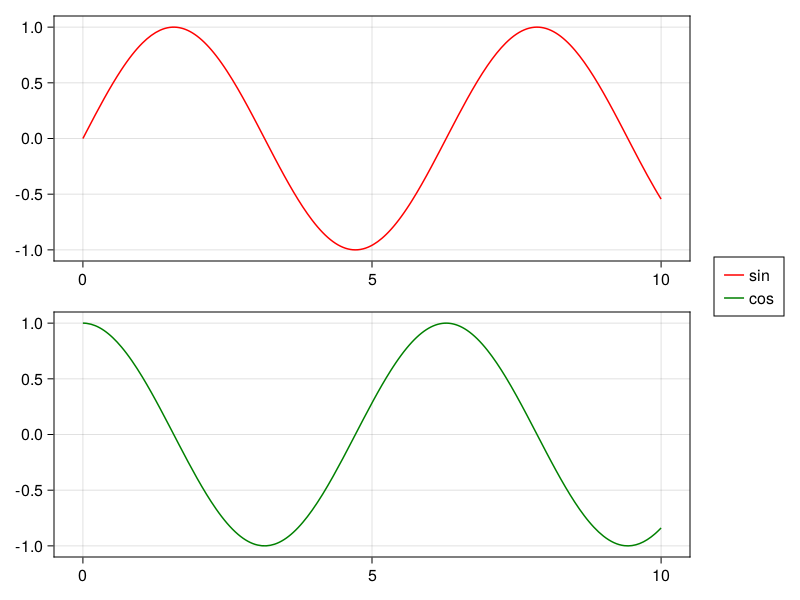

In [132]:
fig = Figure()
ax1, l1 = lines(fig[1,1], 0..10, sin, color=:red)
ax2, l2 = lines(fig[2,1], 0..10, cos, color=:green)
Legend(fig[1:2, 2], [l1, l2], ["sin", "cos"])
fig

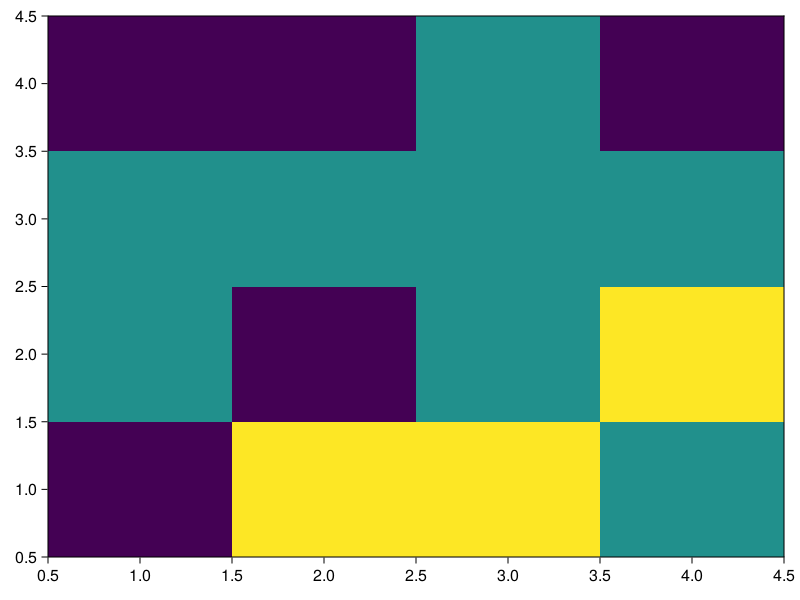

In [144]:
# network = rand(-1:1, 4,4)
fig, ax, hm = heatmap(network)

fig

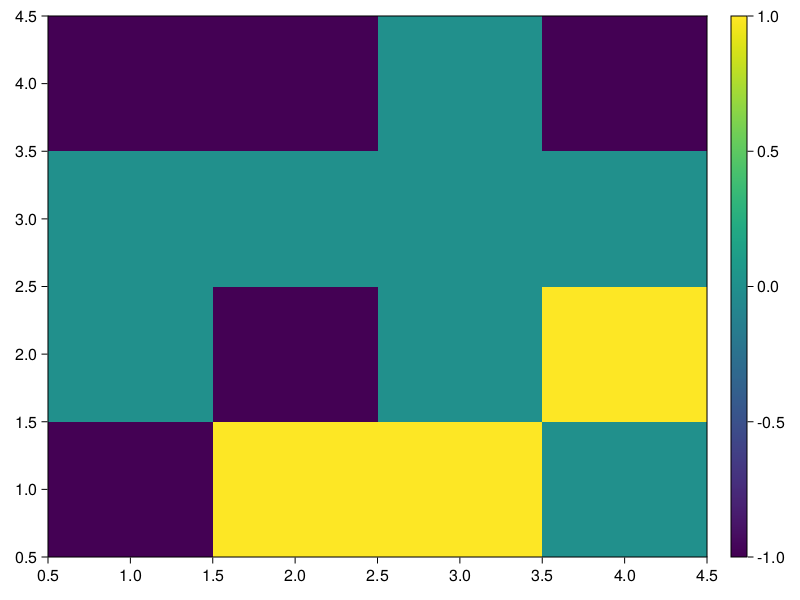

In [168]:
fig = Figure()
ax = Axis(fig[1,1])
hm = heatmap!(ax, network)
Colorbar(fig[1,2], hm)
fig

In [153]:
genRandNet() = rand(-1:1, 3,3)
networks = [genRandNet() for i in 1:10]

10-element Vector{Matrix{Int64}}:
 [0 1 1; 1 0 0; -1 0 0]
 [1 -1 -1; -1 -1 0; 0 0 0]
 [1 1 -1; -1 1 1; 1 1 1]
 [-1 -1 0; 1 0 0; 1 1 -1]
 [1 -1 0; -1 -1 0; -1 1 1]
 [0 -1 -1; 0 0 1; 0 1 0]
 [1 0 1; 1 0 -1; 0 -1 0]
 [0 1 0; 1 1 0; 0 0 1]
 [1 1 1; 1 1 1; -1 1 -1]
 [1 -1 0; 0 0 1; 1 1 0]

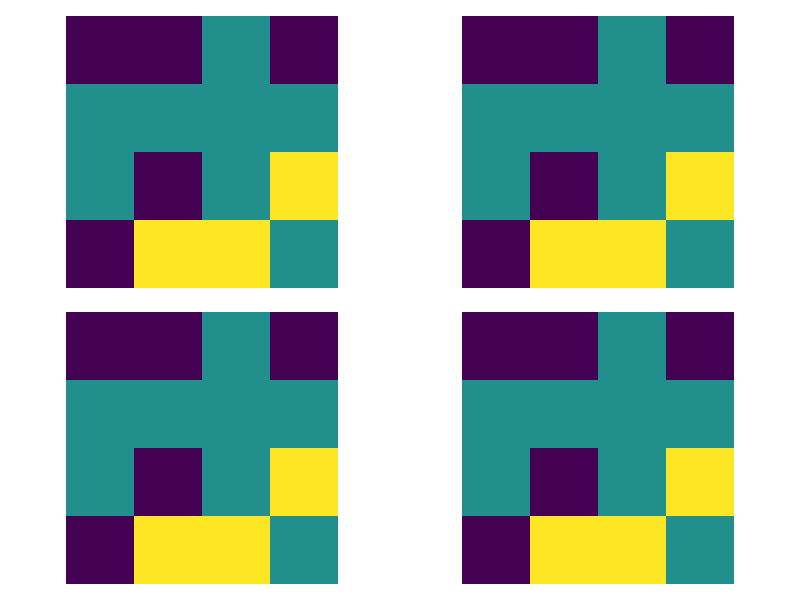

In [261]:
fig = Figure()
count = 1
axs = [Axis(fig[i,j], aspect=DataAspect()) for i = 1:2, j = 1:2]
hms = [heatmap!(axs[i,j], network) for i = 1:2, j = 1:2 ]
hidedecorations!.(axs)
hidespines!.(axs)
fig

In [258]:
function plotNetworkHeatmap(network)
     fig = Figure()
     ax = Axis(fig[1,1], aspect=DataAspect())
     revnet = reverse(network,dims=2)
     nsize = size(network,2)
     heatmap!(ax, revnet)
     text!(ax,
          [string(revnet[i,j]) for i in 1:nsize for j in 1:nsize ],
          position=[(x, y) for x in 1:nsize for y in 1:nsize],
          textsize=30,
          color=[revnet[i,j]<0 ? (:white) : (:black) for i in 1:nsize for j in 1:nsize],
          align=(:center, :center))

     hidedecorations!(ax)
     hidespines!(ax)
     fig
end

plotNetworkHeatmap (generic function with 1 method)

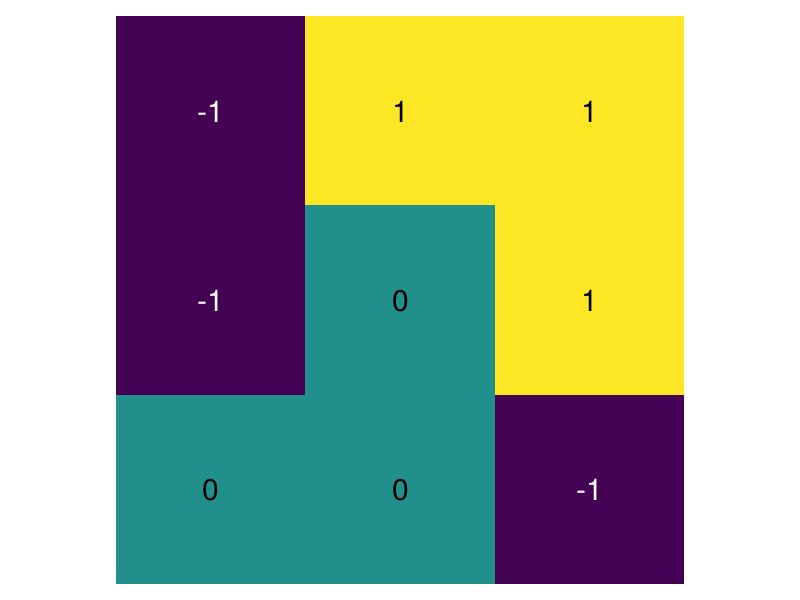

In [259]:
plotNetworkHeatmap(networks[4])

In [260]:
function plotNetworkHeatmapMulti(networks)
  fig = Figure()
  count = 1
  axs = []
  for i in 1:2
      for j in 1:5
          revnet = reverse(networks[count],dims=2)
          nsize = size(revnet,2)
          ax = Axis(fig[i,j], aspect=DataAspect())
          push!(axs, ax)
          heatmap!(ax, revnet)
          text!(ax,
            [string(revnet[i,j]) for i in 1:nsize for j in 1:nsize ],
            position=[(x, y) for x in 1:nsize for y in 1:nsize],
            textsize=15,
            color=[revnet[i,j]<0 ? (:white) : (:black) for i in 1:nsize for j in 1:nsize],
            align=(:center, :center))
          count+=1
      end
  end
  hidedecorations!.(axs)
  hidespines!.(axs)
  fig
end

plotNetworkHeatmapMulti (generic function with 1 method)